# 1) load data set (pandas) +

In [1]:
import pandas as pd
import numpy as np
import tensorflow.keras
import sklearn

In [2]:
df2 = pd.read_csv('CSV/sonar.csv', header=None)

In [3]:
train = int(df2.shape[0] / 100 * 70)
validate = int(df2.shape[0] / 100 * 10) + train
test = df2.shape[0] -  validate 

# 2) shufle dataset (pandas) +

In [4]:
df1 = df2.sample(frac=1)
df1 = sklearn.utils.shuffle(df1)
df = df1.copy(deep=True)

# 1) Label Encoding (pandas) +

In [5]:
total = df.iloc[:,60].unique().shape[0]
df.replace(df.iloc[:,60].unique(), [x for x in range(total)], inplace=True)

# 3) split training (70) validation (10) and test (20) % +
# 4) Split  inputs and labels (output) +
# 5) label one hot coding +

In [6]:
Train_Data = df.iloc[:train,:60].to_numpy()
Train_Label = tensorflow.keras.utils.to_categorical(df.iloc[:train,60])
Vali_Data = df.iloc[train:validate,:60].to_numpy()
Vali_Label = tensorflow.keras.utils.to_categorical(df.iloc[train:validate,60])
Test_Data = df.iloc[validate:,:60].to_numpy()
Test_Label = tensorflow.keras.utils.to_categorical(df.iloc[validate:,60])

In [7]:
print(Train_Data.shape)
print(Train_Label.shape)
print(Vali_Data.shape)
print(Vali_Label.shape)
print(Test_Data.shape)
print(Test_Label.shape)

(145, 60)
(145, 2)
(20, 60)
(20, 2)
(43, 60)
(43, 2)


# 6) fit model without validation (compare training and testing acuracies)

In [8]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(60, activation='relu', input_shape=(60,)),
    tensorflow.keras.layers.Dense(40, activation='relu'),
    tensorflow.keras.layers.Dropout(0.2),
    tensorflow.keras.layers.Dense(2, activation='softmax'),
])

In [9]:
model.compile(
    optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.fit(Train_Data, Train_Label, epochs=100)

Train on 145 samples
Epoch 1/100
145/145 [==============================] - 1s 8ms/sample - loss: 0.9837 - accuracy: 0.5310
Epoch 2/100
145/145 [==============================] - 0s 209us/sample - loss: 0.6879 - accuracy: 0.5724
Epoch 3/100
145/145 [==============================] - 0s 148us/sample - loss: 0.6555 - accuracy: 0.6621
Epoch 4/100
145/145 [==============================] - 0s 159us/sample - loss: 0.5935 - accuracy: 0.6897
Epoch 5/100
145/145 [==============================] - 0s 152us/sample - loss: 0.5500 - accuracy: 0.6966
Epoch 6/100
145/145 [==============================] - 0s 152us/sample - loss: 0.6092 - accuracy: 0.6828
Epoch 7/100
145/145 [==============================] - 0s 159us/sample - loss: 0.5474 - accuracy: 0.6966
Epoch 8/100
145/145 [==============================] - 0s 152us/sample - loss: 0.5427 - accuracy: 0.7034
Epoch 9/100
145/145 [==============================] - 0s 159us/sample - loss: 0.4734 - accuracy: 0.7793
Epoch 10/100
145/145 [==============

145/145 [==============================] - 0s 214us/sample - loss: 0.0259 - accuracy: 0.9931
Epoch 78/100
145/145 [==============================] - 0s 179us/sample - loss: 0.0189 - accuracy: 1.0000
Epoch 79/100
145/145 [==============================] - 0s 159us/sample - loss: 0.0335 - accuracy: 1.0000
Epoch 80/100
145/145 [==============================] - 0s 172us/sample - loss: 0.5080 - accuracy: 0.8621
Epoch 81/100
145/145 [==============================] - 0s 193us/sample - loss: 0.0899 - accuracy: 0.9793
Epoch 82/100
145/145 [==============================] - 0s 172us/sample - loss: 0.0276 - accuracy: 0.9931
Epoch 83/100
145/145 [==============================] - 0s 214us/sample - loss: 0.0201 - accuracy: 1.0000
Epoch 84/100
145/145 [==============================] - 0s 165us/sample - loss: 0.0130 - accuracy: 1.0000
Epoch 85/100
145/145 [==============================] - 0s 165us/sample - loss: 0.0121 - accuracy: 1.0000
Epoch 86/100
145/145 [==============================] - ETA

In [11]:
evaluation = model.evaluate(Test_Data,Test_Label, verbose=1)

43/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# 7) fit model wit validation (with history)

In [12]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(60, activation='relu', input_shape=(60,)),
    tensorflow.keras.layers.Dense(40, activation='relu'),
    tensorflow.keras.layers.Dropout(0.2),
    tensorflow.keras.layers.Dense(2, activation='softmax'),
])

In [13]:
model.compile(
    optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(Train_Data,
Train_Label,
epochs=100,
validation_data=(Vali_Data, Vali_Label))

Train on 145 samples, validate on 20 samples
Epoch 1/100
145/145 [==============================] - 1s 8ms/sample - loss: 0.9122 - accuracy: 0.5586 - val_loss: 0.6911 - val_accuracy: 0.5500
Epoch 2/100
145/145 [==============================] - 0s 721us/sample - loss: 0.6741 - accuracy: 0.6000 - val_loss: 0.6832 - val_accuracy: 0.6000
Epoch 3/100
145/145 [==============================] - 0s 544us/sample - loss: 0.6909 - accuracy: 0.5448 - val_loss: 0.5548 - val_accuracy: 0.7000
Epoch 4/100
145/145 [==============================] - 0s 496us/sample - loss: 0.6043 - accuracy: 0.7172 - val_loss: 0.7371 - val_accuracy: 0.4500
Epoch 5/100
145/145 [==============================] - 0s 427us/sample - loss: 0.6649 - accuracy: 0.6138 - val_loss: 0.7034 - val_accuracy: 0.4500
Epoch 6/100
145/145 [==============================] - 0s 469us/sample - loss: 0.5829 - accuracy: 0.7034 - val_loss: 0.4456 - val_accuracy: 0.8500
Epoch 7/100
145/145 [==============================] - 0s 446us/sample - lo

145/145 [==============================] - 0s 627us/sample - loss: 0.1425 - accuracy: 0.9448 - val_loss: 0.6679 - val_accuracy: 0.7000
Epoch 57/100
145/145 [==============================] - 0s 503us/sample - loss: 0.2129 - accuracy: 0.8897 - val_loss: 0.3792 - val_accuracy: 0.8000
Epoch 58/100
145/145 [==============================] - 0s 407us/sample - loss: 0.2722 - accuracy: 0.8690 - val_loss: 0.2285 - val_accuracy: 0.8500
Epoch 59/100
145/145 [==============================] - 0s 373us/sample - loss: 0.1307 - accuracy: 0.9724 - val_loss: 0.4795 - val_accuracy: 0.7500
Epoch 60/100
145/145 [==============================] - 0s 562us/sample - loss: 0.2723 - accuracy: 0.8552 - val_loss: 0.3078 - val_accuracy: 0.8000
Epoch 61/100
145/145 [==============================] - 0s 545us/sample - loss: 0.1264 - accuracy: 0.9586 - val_loss: 0.4550 - val_accuracy: 0.7500
Epoch 62/100
145/145 [==============================] - 0s 565us/sample - loss: 0.1494 - accuracy: 0.9448 - val_loss: 0.2192 

In [15]:
evaluation2 = model.evaluate(Test_Data,Test_Label, verbose=1)

43/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# 8) create graph

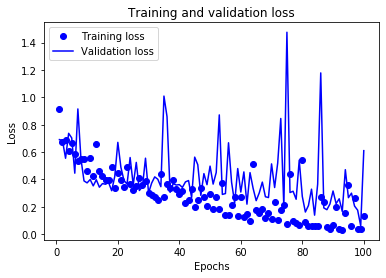

In [18]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

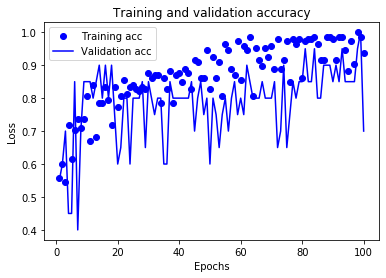

In [19]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 9) Introduce k-fold, as data is limited

In [20]:
df = df1.copy(deep=True)

total = df.iloc[:,60].unique().shape[0]
df.replace(df.iloc[:,60].unique(), [x for x in range(total)], inplace=True)

Train_Data = df.iloc[:166,:60].to_numpy()
Train_Label = tensorflow.keras.utils.to_categorical(df.iloc[:166,60])
Test_Data = df.iloc[166:,:60].to_numpy()
Test_Label = tensorflow.keras.utils.to_categorical(df.iloc[166:,60])


def build_model():
    model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(60, activation='relu', input_shape=(60,)),
    tensorflow.keras.layers.Dense(40, activation='relu'),
    tensorflow.keras.layers.Dropout(0.2),
    tensorflow.keras.layers.Dense(2, activation='softmax'),
    ])
    model.compile(
        optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.01),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model
        

In [21]:
k = 4
num_val_samples = len(Train_Data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = Train_Data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Train_Label[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [Train_Data[:i * num_val_samples],
        Train_Data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [Train_Label[:i * num_val_samples],
        Train_Label[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [22]:
print(np.mean(all_scores))

0.7743903


# 10) tune nework accuracy by ephoc numbers, change of optimizer, batch size, hidden layers, number of nueron, 